In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, auc, roc_curve, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Load and split dataset

In [4]:
df = pd.read_csv("../data/heart_disease.csv")
X = df.drop("num", axis=1)
y = df["num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
df

,PC1,PC2,PC4,PC5,PC6,PC7,num
0,0.675205,0.344930,-0.087400,-0.438102,1.117363,-0.144715,0.0
1,3.544619,0.506039,-0.653609,0.713136,-1.170823,0.391445,2.0
2,2.386927,-1.237065,-0.018786,0.465064,0.576870,-0.705147,1.0
3,-1.344182,-0.262477,2.743671,0.313740,1.221851,0.702343,0.0
4,-1.755805,-0.296602,0.764861,0.245258,0.185786,0.279775,0.0
...,...,...,...,...,...,...,...
298,-0.622619,-1.052430,0.766006,-1.006978,-0.233717,0.353068,1.0
299,2.566185,-0.885424,-0.090710,1.081507,0.992006,-0.348138,2.0
300,0.905604,-2.366826,-1.188388,-0.033922,-0.595107,-0.390816,3.0
301,-0.777244,0.692779,-0.656726,0.792481,0.273470,-0.046283,1.0


# Logistic Regression

In [46]:
# Create and train the model
log_reg_model = LogisticRegression(random_state=30)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_log_reg, zero_division=0)}")

Logistic Regression Results:

Accuracy: 0.6230

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92        39
         1.0       0.12      0.17      0.14         6
         2.0       0.14      0.12      0.13         8
         3.0       0.11      0.25      0.15         4
         4.0       0.00      0.00      0.00         4

    accuracy                           0.62        61
   macro avg       0.26      0.29      0.27        61
weighted avg       0.64      0.62      0.63        61



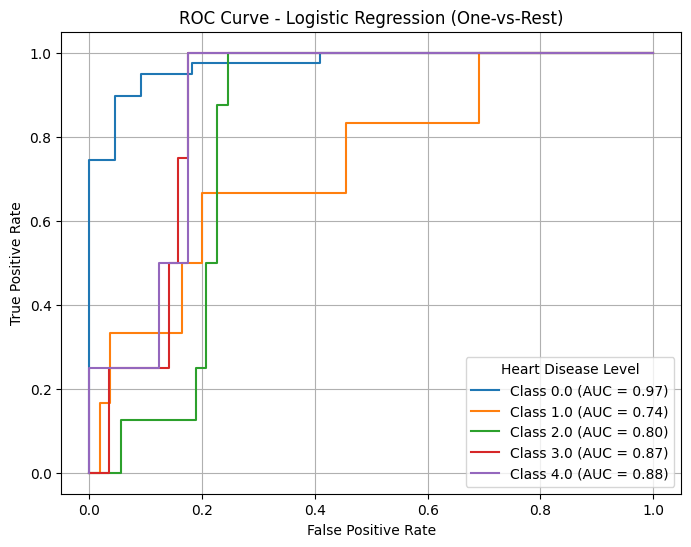

In [86]:
# ROC Curve and AUC Score

def plot_roc_curve(X_test, y_test, model, model_name="Model"):
    y_prob = model.predict_proba(X_test)

    plt.figure(figsize=(8, 6))
    for i in range(model.classes_.shape[0]):
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=model.classes_[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1.5, label=f'Class {model.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name} (One-vs-Rest)')
    plt.legend(title='Heart Disease Level', loc='lower right')
    plt.grid(True)
    plt.show()

plot_roc_curve(X_test, y_test, model=log_reg_model, model_name="Logistic Regression")




# Decision Tree

In [ ]:
# create and train the model
dt_model = DecisionTreeClassifier(random_state=30, max_depth=3)
dt_model.fit(X_train, y_train)

# make predictions
y_pred_dt = dt_model.predict(X_test)

# evaluate the model
print("Decision Tree Results:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_dt, zero_division=0)}")

Decision Tree Results:

Accuracy: 0.6393

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89        39
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00         8
         3.0       0.19      1.00      0.32         4
         4.0       0.00      0.00      0.00         4

    accuracy                           0.64        61
   macro avg       0.21      0.38      0.24        61
weighted avg       0.57      0.64      0.59        61



# Random Forest

In [ ]:
# create and train the model
rf_model = RandomForestClassifier(n_estimators=50, random_state=30)
rf_model.fit(X_train, y_train)

# make predictions
y_pred_rf = rf_model.predict(X_test)

# evaluate the model
print("Random Forest Results:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_rf, zero_division=0)}")

Random Forest Results:

Accuracy: 0.6885

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        39
         1.0       0.29      0.33      0.31         6
         2.0       0.20      0.12      0.15         8
         3.0       0.22      0.50      0.31         4
         4.0       0.00      0.00      0.00         4

    accuracy                           0.69        61
   macro avg       0.33      0.38      0.34        61
weighted avg       0.66      0.69      0.67        61



# Support Vector Machine

In [ ]:
# create and train the model
svm_model = SVC(kernel='rbf', random_state=30)
svm_model.fit(X_train, y_train)

# make predictions
y_pred_svm = svm_model.predict(X_test)

# evaluate the model
print("Support Vector Machine Results:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_svm, zero_division=0)}")

Support Vector Machine Results:

Accuracy: 0.6557

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93        39
         1.0       0.20      0.17      0.18         6
         2.0       0.14      0.12      0.13         8
         3.0       0.12      0.25      0.17         4
         4.0       0.00      0.00      0.00         4

    accuracy                           0.66        61
   macro avg       0.27      0.30      0.28        61
weighted avg       0.62      0.66      0.64        61

